# CIFAR10

## Package

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt



## Data set

In [2]:
trainset = datasets.CIFAR10(root='data/cifar10_train', train=True, download=False, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

print(len(trainset))

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

50000


## Sample

In [8]:
#img, label = trainset[np.random.randint(0, len(trainset)-1)]
img, label = next(iter(trainloader))

label

tensor([5])

In [9]:
classes[label.item()]

'dog'

In [10]:
img.size()

torch.Size([1, 3, 32, 32])

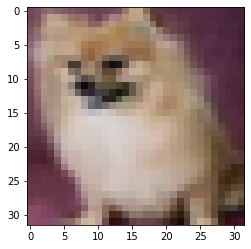

In [11]:
plt.imshow(img.reshape(3, 32, 32).permute(1, 2, 0), cmap='gray')

## Model

In [13]:

model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(6, 16, 5),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(), # ???
        nn.Linear(16 * 5 * 5, 120), # ???
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10))



In [14]:
predict = model(img)

print(predict)


tensor([[ 0.0315,  0.0493,  0.1052, -0.0922, -0.0183,  0.1531,  0.0727,  0.1254,
          0.1059, -0.1022]], grad_fn=<AddmmBackward>)


## Loss

### Cross Entropy

In [15]:
criterion = nn.CrossEntropyLoss()

criterion(predict, label)

tensor(2.1960, grad_fn=<NllLossBackward>)

## Train

### Data loader

In [17]:
batch_sz = 500
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_sz, shuffle=True)

### Learn rate

In [16]:
learning_rate = 0.1

### Optimizer

In [18]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)

### Batch training

In [19]:
!rm -rf runs
writer = SummaryWriter('runs/cifar10')

n_epochs = 10
for epoch in range(n_epochs):
    epoch_loss = 0
    for _, data in enumerate(trainloader):
        imgs, labels = data
        predicts = model(imgs)
        curr_loss = criterion(predicts, labels)
    
        optimizer.zero_grad()
        curr_loss.backward()
        optimizer.step()
        
        epoch_loss += curr_loss
    writer.add_scalar("Loss/train", epoch_loss, epoch)
    print("Epoch: %d, Loss: %f" % (epoch, float(epoch_loss)))

Epoch: 0, Loss: 229.201859
Epoch: 1, Loss: 219.264877
Epoch: 2, Loss: 207.374435
Epoch: 3, Loss: 195.969406
Epoch: 4, Loss: 187.184418
Epoch: 5, Loss: 178.445801
Epoch: 6, Loss: 169.926666
Epoch: 7, Loss: 162.082794
Epoch: 8, Loss: 157.428757
Epoch: 9, Loss: 152.491608


In [20]:
img, _ = next(iter(trainloader))
writer.add_graph(model, img)
writer.flush()
writer.close()

In [21]:
!tensorboard --logdir=runs/cifar10

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Test accuracy

### Test set

In [25]:
testset = datasets.CIFAR10(root='data/cifar10_test', train=False, download=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

horse


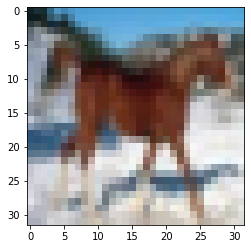

In [29]:
img, label = next(iter(testloader))
predict = model(img)

_, predicted_label = torch.max(predict, dim=1)

print(classes[predicted_label.item()])

plt.imshow(img.reshape(3, 32, 32).permute(1, 2, 0), cmap='gray')